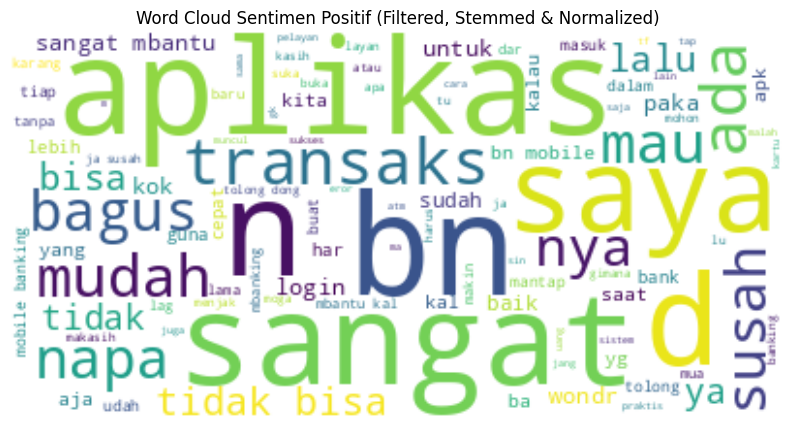

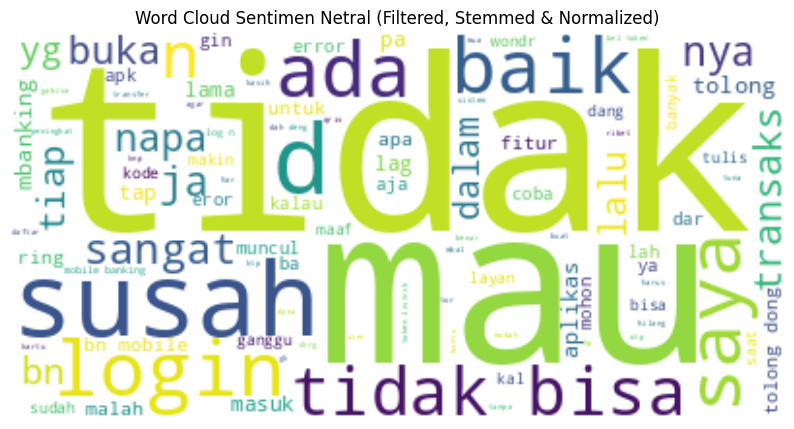

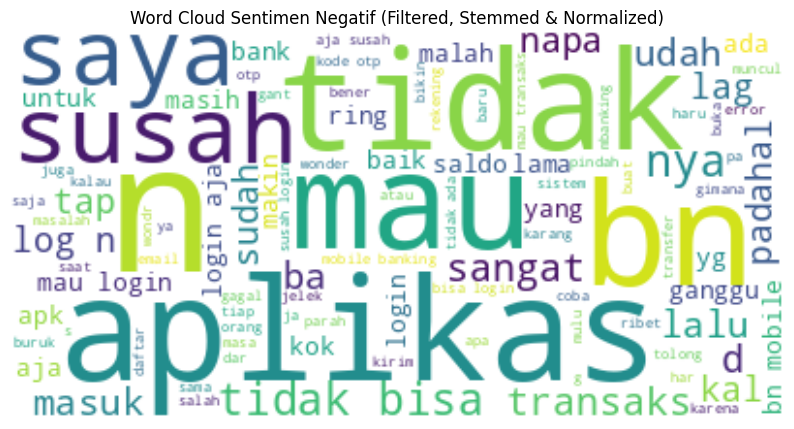

Distribusi Sentimen (dalam persentase):
sentimen
Negatif    66.347469
Positif    24.897401
Netral      8.755130
Name: proportion, dtype: float64


<ipython-input-112-24621dda78a9>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribusi_sentimen.index, y=distribusi_sentimen.values, palette='viridis')


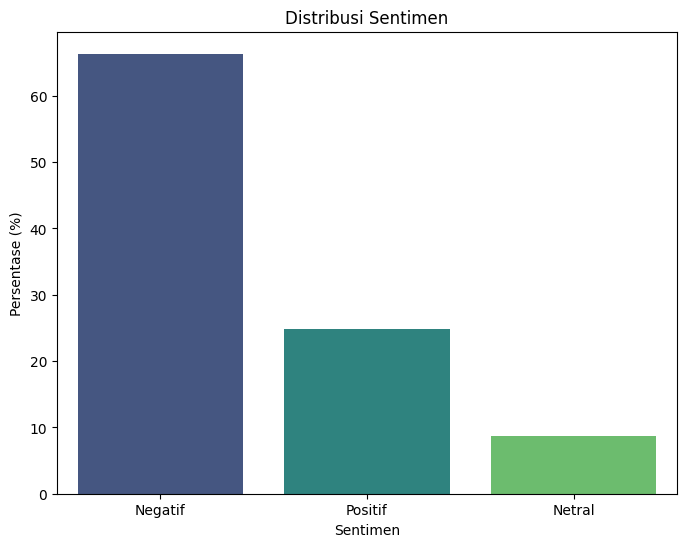


Rata-rata Jumlah Kata per Sentimen:
sentimen
Negatif    15.604124
Netral     16.359375
Positif     9.532967
Name: jumlah_kata, dtype: float64


<ipython-input-112-24621dda78a9>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_jumlah_kata.index, y=rata_jumlah_kata.values, palette='magma')


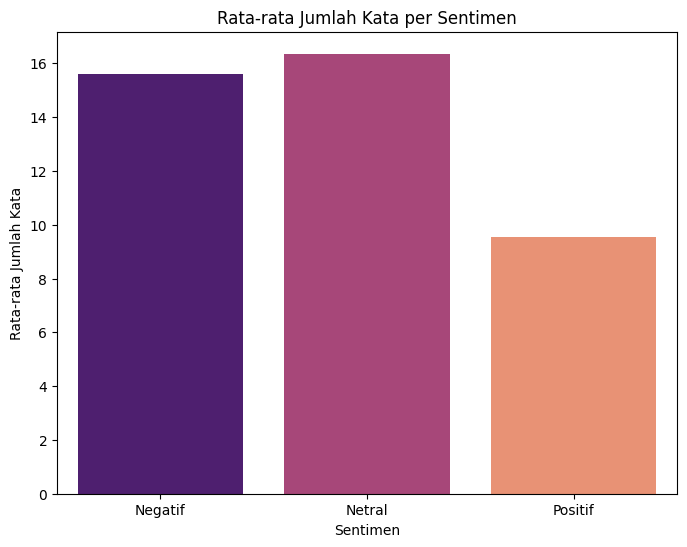


Kata Teratas Sentimen Positif:
[('sangat', 43), ('bn', 41), ('bisa', 33), ('n', 33), ('tidak', 32), ('aplikas', 29), ('d', 27), ('mbantu', 24), ('saya', 24), ('transaks', 23)]

Kata Teratas Sentimen Netral:
[('tidak', 35), ('mau', 18), ('bisa', 17), ('n', 16), ('susah', 16), ('bn', 15), ('d', 14), ('tolong', 14), ('login', 14), ('baik', 13)]

Kata Teratas Sentimen Negatif:
[('tidak', 220), ('mau', 162), ('n', 162), ('susah', 155), ('login', 146), ('bisa', 142), ('bn', 129), ('aplikas', 102), ('aja', 97), ('nya', 88)]


In [112]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Langkah 1: Memuat dataset CSV
file_path = '/content/selected_columns_reviews.csv'  # Ganti dengan path file CSV kamu
data = pd.read_csv(file_path)

# Langkah 2: Fungsi untuk mengklasifikasikan sentimen berdasarkan skor
def klasifikasi_sentimen(score):
    if score >= 4:
        return 'Positif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Negatif'

# Menambahkan kolom 'sentimen' berdasarkan kolom 'score'
data['sentimen'] = data['score'].apply(klasifikasi_sentimen)

# Langkah 3: Daftar kata tidak baku yang sering muncul dan perlu dinormalisasi
normalisasi_kata = {
    "gak": "tidak",
    "nggak": "tidak",
    "ga": "tidak",
    "iya": "ya",
    "banget": "sangat",
    "kalo": "kalau",
    "aku": "saya",
    "gue": "saya",
    "loh": "",
    "nih": "",
    "bro": "saudara"
}

# Langkah 4: Fungsi untuk membersihkan dan menormalisasi teks
def pra_pemrosesan_teks(teks):
    teks = teks.lower()  # Ubah huruf menjadi huruf kecil
    teks = re.sub(r'[^\w\s]', '', teks)  # Hapus tanda baca dan angka
    teks = re.sub(r'\s+', ' ', teks).strip()  # Hapus spasi berlebih
    # Normalisasi kata
    teks = ' '.join([normalisasi_kata.get(kata, kata) for kata in teks.split()])
    return teks

# Menerapkan pra-pemrosesan pada kolom 'content'
data['clean_content'] = data['content'].apply(pra_pemrosesan_teks)

# Langkah 5: Hanya menyimpan teks yang memiliki minimal 3 kata dan maksimal 50 kata
def jumlah_kata(teks):
    return len(teks.split())

data = data[data['clean_content'].apply(jumlah_kata).between(3, 50)]

# Langkah 6: Daftar imbuhan umum dalam bahasa Indonesia (prefiks dan sufiks)
imbuhan = ['ber', 'di', 'ke', 'me', 'per', 'se', 'ter', 'kan', 'an', 'i']

# Fungsi untuk menghapus imbuhan (stem dasar)
def hapus_imbuhan(teks):
    kata2 = teks.split()
    hasil_stemming = []
    for kata in kata2:
        for imbuh in imbuhan:
            if kata.startswith(imbuh):
                kata = kata[len(imbuh):]
            if kata.endswith(imbuh):
                kata = kata[:-len(imbuh)]
        hasil_stemming.append(kata)
    return ' '.join(hasil_stemming)

# Menerapkan penghapusan imbuhan pada kolom 'clean_content'
data['clean_content'] = data['clean_content'].apply(hapus_imbuhan)

# Langkah 7: Membagi review menjadi positif, netral, dan negatif
review_positif = data[data['sentimen'] == 'Positif']['clean_content']
review_netral = data[data['sentimen'] == 'Netral']['clean_content']
review_negatif = data[data['sentimen'] == 'Negatif']['clean_content']

# Menggabungkan teks dalam tiap kategori sentimen
teks_positif = ' '.join(review_positif)
teks_netral = ' '.join(review_netral)
teks_negatif = ' '.join(review_negatif)

# Langkah 8: Fungsi untuk membuat word cloud
def buat_wordcloud(teks, judul):
    wordcloud = WordCloud(stopwords=sklearn_stopwords, background_color='white', max_words=100).generate(teks)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(judul)
    plt.show()

# Membuat word cloud untuk masing-masing sentimen
buat_wordcloud(teks_positif, "Word Cloud Sentimen Positif (Filtered, Stemmed & Normalized)")
buat_wordcloud(teks_netral, "Word Cloud Sentimen Netral (Filtered, Stemmed & Normalized)")
buat_wordcloud(teks_negatif, "Word Cloud Sentimen Negatif (Filtered, Stemmed & Normalized)")

# Langkah 9: Membandingkan distribusi sentimen
distribusi_sentimen = data['sentimen'].value_counts(normalize=True) * 100
print("Distribusi Sentimen (dalam persentase):")
print(distribusi_sentimen)

# Membuat barchart distribusi sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=distribusi_sentimen.index, y=distribusi_sentimen.values, palette='viridis')
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Persentase (%)")
plt.show()

# Langkah 10: Rata-rata jumlah kata per sentimen
data['jumlah_kata'] = data['clean_content'].apply(jumlah_kata)
rata_jumlah_kata = data.groupby('sentimen')['jumlah_kata'].mean()
print("\nRata-rata Jumlah Kata per Sentimen:")
print(rata_jumlah_kata)

# Membuat barchart rata-rata jumlah kata per sentimen
plt.figure(figsize=(8, 6))
sns.barplot(x=rata_jumlah_kata.index, y=rata_jumlah_kata.values, palette='magma')
plt.title("Rata-rata Jumlah Kata per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Rata-rata Jumlah Kata")
plt.show()

# Langkah 11: Fungsi untuk mendapatkan kata paling sering muncul
def kata_terbanyak(teks, jumlah_kata=10):
    kata2 = teks.split()
    frekuensi_kata = Counter(kata2)
    return frekuensi_kata.most_common(jumlah_kata)

# Kata paling sering muncul untuk tiap kategori sentimen
kata_teratas_positif = kata_terbanyak(teks_positif)
kata_teratas_netral = kata_terbanyak(teks_netral)
kata_teratas_negatif = kata_terbanyak(teks_negatif)

print("\nKata Teratas Sentimen Positif:")
print(kata_teratas_positif)
print("\nKata Teratas Sentimen Netral:")
print(kata_teratas_netral)
print("\nKata Teratas Sentimen Negatif:")
print(kata_teratas_negatif)
